# Test Gaussian and Bernoulli DropConnect and Dropout

In [2]:
import torch

In [3]:
import torch.nn as nn

In [4]:
from trustworthai.models.uq_models.uq_layers.dropoutconnect import (
    UQDropout,
    UQDropout2d,
    UQDropout3d,
    UQGaussianDropout,
    UQGaussianDropout2d,
    UQGaussianDropout3d,
    UQDropConnect,
    UQDropConnect2d,
    UQDropConnect3d,
    UQGaussianConnect,
    UQGaussianConnect2d,
    UQGaussianConnect3d,
)

### Testing 1D Dropout and Gaussian Dropout

In [67]:
x = torch.ones(1,4)

In [68]:
layer1 = nn.Linear(4, 4, bias=False)

In [69]:
dropout = UQDropout(p=0.5)
gaussout = UQGaussianDropout(mean=1., p=0.1)

In [70]:
layer1(x)

tensor([[-0.2566, -0.3229, -0.8096,  0.7576]], grad_fn=<MmBackward0>)

In [78]:
dropout(layer1(x))

tensor([[-0.5132, -0.6458, -1.6191,  0.0000]], grad_fn=<MulBackward0>)

In [77]:
gaussout(layer1(x))

tensor([[-0.2753, -0.3015, -0.9046,  0.8552]], grad_fn=<MulBackward0>)

### Testing 1D Drop Connect

In [134]:
import matplotlib.pyplot as plt
import numpy as np

In [203]:
def plot_weight_grid(x):
    plt.imshow(np.abs(x.numpy()), cmap="YlOrBr")
    shape = x.shape
    plt.colorbar()
    plt.grid(color='black', linewidth=2)
    plt.xticks(np.arange(-0.5, shape[0]-0.5, 1))
    plt.yticks(np.arange(-0.5,shape[1]-0.5, 1))
    plt.show()

In [204]:
x = torch.ones(1, 4)

In [244]:
layer1 = nn.Linear(4, 4, bias=False)
layer2 = nn.Linear(4, 4, bias=False)
layer2.weight.data.copy_(layer1.weight.data);

In [245]:
layer2.weight

Parameter containing:
tensor([[ 0.1612,  0.4447, -0.4151,  0.2806],
        [ 0.2476,  0.1494, -0.0734, -0.2964],
        [ 0.2406, -0.0060, -0.2262,  0.3815],
        [-0.3314, -0.1039, -0.0812, -0.1410]], requires_grad=True)

In [246]:
layer1(x)

tensor([[ 0.4714,  0.0272,  0.3899, -0.6575]], grad_fn=<MmBackward0>)

In [247]:
dropconn = UQDropConnect(layer1, None, 0.5)
#gaussdropconn = UQGaussianConnect(layer1, None, 1, 0.5)

In [248]:
layer2(x)

tensor([[ 0.4714,  0.0272,  0.3899, -0.6575]], grad_fn=<MmBackward0>)

In [249]:
dropconn(x)

tensor([[ 0.0534,  0.2011, -0.0119, -0.8253]], grad_fn=<MmBackward0>)

In [250]:
layer1.weight_raw

Parameter containing:
tensor([[ 0.1612,  0.4447, -0.4151,  0.2806],
        [ 0.2476,  0.1494, -0.0734, -0.2964],
        [ 0.2406, -0.0060, -0.2262,  0.3815],
        [-0.3314, -0.1039, -0.0812, -0.1410]], requires_grad=True)

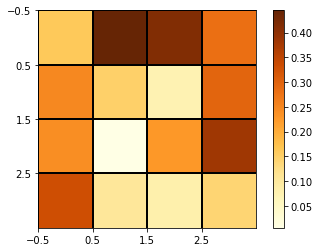

In [251]:
plot_weight_grid(layer1.weight_raw.detach())

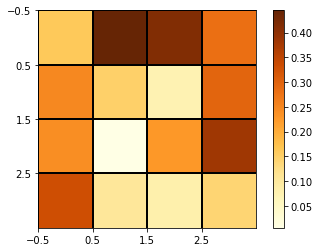

In [252]:
plot_weight_grid(layer2.weight.detach())

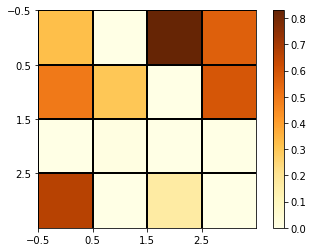

In [253]:
plot_weight_grid(layer1.weight.detach())

### Testing 1D Gaussian Drop Connect

In [271]:
x = torch.ones(1, 4)

In [283]:
layer1 = nn.Linear(4, 4, bias=False)
layer2 = nn.Linear(4, 4, bias=False)
layer2.weight.data.copy_(layer1.weight.data);

In [284]:
layer1(x)

tensor([[-0.5953,  0.0910, -0.0387, -0.9961]], grad_fn=<MmBackward0>)

In [285]:
gaussdropconn = UQGaussianConnect(layer1, None, 1, 0.25)

In [296]:
layer2(x)

tensor([[-0.5953,  0.0910, -0.0387, -0.9961]], grad_fn=<MmBackward0>)

In [301]:
gaussdropconn(x)

tensor([[-6.4930e-01, -3.2115e-04, -1.0881e-01, -8.8192e-01]],
       grad_fn=<MmBackward0>)

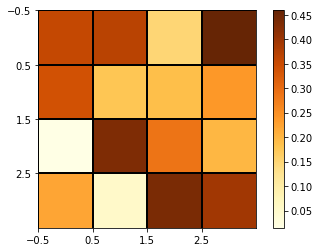

In [288]:
plot_weight_grid(layer1.weight_raw.detach())

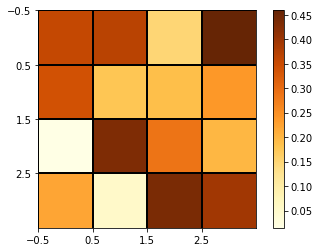

In [289]:
plot_weight_grid(layer2.weight.detach())

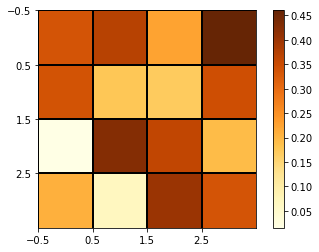

In [302]:
plot_weight_grid(layer1.weight.detach())

### Testing 2D dropout and gaussian dropout

In [135]:
conv1 = nn.Conv2d(3, 32, kernel_size=3)
conv2 = nn.Conv2d(3, 32, kernel_size=3)
conv2.weight.data.copy_(conv1.weight);

In [136]:
dropout2d = UQDropout2d(p=0.5)
gaussout2d = UQGaussianDropout2d(mean=1, p=0.5)

In [150]:
x = torch.rand((1, 3, 5, 5))

In [151]:
conv1(x).shape

torch.Size([1, 32, 3, 3])

In [152]:
conv1.weight[0][0]

tensor([[-0.0313, -0.1042,  0.1085],
        [ 0.0475,  0.1541,  0.0957],
        [-0.0003, -0.0172, -0.1879]], grad_fn=<SelectBackward0>)

In [181]:
y = conv1(x)
y[0][1]

tensor([[-0.0943, -0.2526, -0.1334],
        [-0.2463, -0.1199, -0.1333],
        [-0.0930, -0.3127, -0.4273]], grad_fn=<SelectBackward0>)

In [180]:
y = dropout2d(conv1(x))
y[0][1] * 0.5

tensor([[-0.0943, -0.2526, -0.1334],
        [-0.2463, -0.1199, -0.1333],
        [-0.0930, -0.3127, -0.4273]], grad_fn=<MulBackward0>)

In [155]:
y = gaussout2d(conv1(x))
y[0][1]

tensor([[0.0181, 0.0485, 0.0256],
        [0.0473, 0.0230, 0.0256],
        [0.0179, 0.0601, 0.0821]], grad_fn=<SelectBackward0>)

In [122]:
x_dims = len(x.shape)
shape = x.shape
dropout_shape = torch.ones(x_dims, dtype=int)
dropout_shape[0] = shape[0]
dropout_shape[1] = shape[1]
mean = torch.ones(torch.Size(dropout_shape.tolist()), dtype=x.dtype, device=x.device)
gaussian_noise = torch.normal(mean, 0.1)

### Testing 2D drop connect and gaussian drop connect

In [194]:
x = torch.randn(1, 3, 5, 5)

In [236]:
conv1 = nn.Conv2d(3, 32, kernel_size=3)
conv2 = nn.Conv2d(3, 32, kernel_size=3)
conv2.weight.data.copy_(conv1.weight);

In [237]:
conv2.weight.shape

torch.Size([32, 3, 3, 3])

In [238]:
conv1(x)[0][0]

tensor([[ 0.7519,  0.1653, -0.2391],
        [-0.2689,  0.1135, -0.4903],
        [-0.7090,  0.2990,  0.9272]], grad_fn=<SelectBackward0>)

In [239]:
dropconn2d = UQDropConnect2d(conv1, None, 0.5)
gaussdropconn2d = UQGaussianConnect2d(conv2, None, 1, 0.1)

In [247]:
dropconn2d(x)[0][0]

tensor([[ 0.2893, -0.4288,  0.0452],
        [-0.2533,  0.6271, -0.8649],
        [-0.4782, -0.2056,  1.5272]], grad_fn=<SelectBackward0>)

In [261]:
gaussdropconn2d(x)[0][0]

tensor([[ 0.6558,  0.1235, -0.2251],
        [-0.2509,  0.1018, -0.4585],
        [-0.6422,  0.2444,  0.8285]], grad_fn=<SelectBackward0>)

In [250]:
layer1.weight_raw

Parameter containing:
tensor([[ 0.1612,  0.4447, -0.4151,  0.2806],
        [ 0.2476,  0.1494, -0.0734, -0.2964],
        [ 0.2406, -0.0060, -0.2262,  0.3815],
        [-0.3314, -0.1039, -0.0812, -0.1410]], requires_grad=True)